In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Foodborne Disease Outbreaks, 1998-2015
#https://www.kaggle.com/cdc/foodborne-diseases
#Using the dataset from January 1998 to December 2015 


In [33]:
outbreak_df = pd.read_csv("/Users/weldonliu/Desktop/BIS634/HW3_Yuechen_Liu/outbreaks.csv")

In [34]:
outbreak_df

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19114,2015,December,Wisconsin,Restaurant,NaN,NaN,Norovirus genogroup II,GII_14,Confirmed,4,0.0,0.0
19115,2015,December,Wisconsin,Private Home/Residence,Salsa,NaN,Norovirus genogroup II,GII_2,Confirmed,16,0.0,0.0
19116,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,NaN,Norovirus genogroup II,GII_17 Kawasaki (2014),Confirmed,43,3.0,0.0
19117,2015,December,Wisconsin,Fast Food Restaurant,NaN,NaN,Norovirus genogroup II,GII_2,Confirmed,5,0.0,0.0


In [ ]:
#1. Which month does foodborne tend to occur the most? 

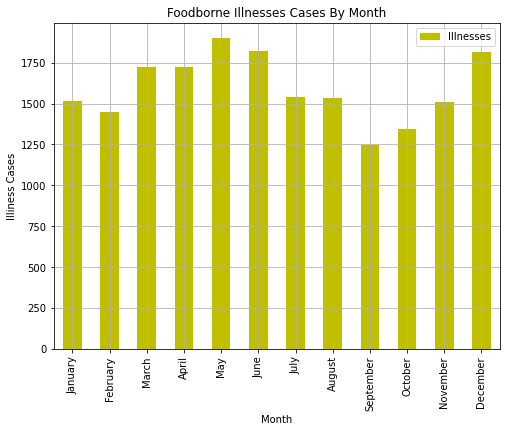

In [145]:
df1 = pd.pivot_table(outbreak_df, index='Month', values='Illnesses', aggfunc='count')#https://stackoverflow.com/questions/34193862/pandas-pivot-table-list-of-aggfunc
df1 = df1.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])#https://stackoverflow.com/questions/61127657/reindex-on-both-index-and-columns-at-the-same-time
ax = df1.plot(kind='bar', color='y', grid=True)
plt.title('Foodborne Illnesses Cases By Month')
plt.ylabel('Illiness Cases')
fig = plt.gcf()#https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig.set_size_inches(8, 6)


In [ ]:
#Foodborne tends to occur most in May,June, and December.

In [ ]:
#2. Has foodborne disease outbreaks gotten worse over the years? 

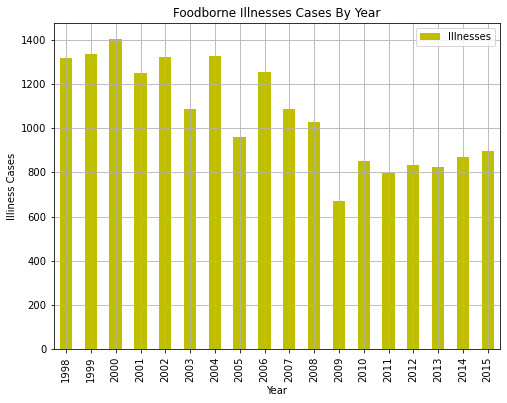

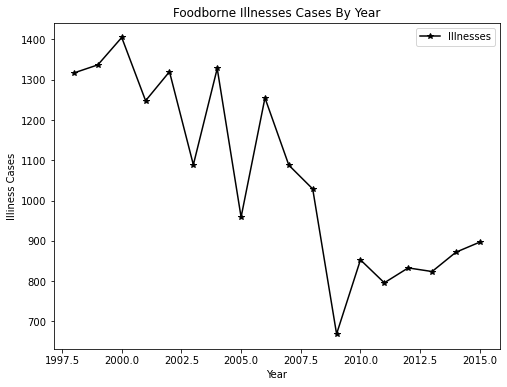

In [153]:
df1 = pd.pivot_table(outbreak_df, index='Year', values='Illnesses', aggfunc='count')
ax1 = df1.plot(kind='bar', color='y',grid=True)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.title('Foodborne Illnesses Cases By Year')
plt.ylabel('Illiness Cases')
ax2 = df1.plot(kind='line',marker='*',color='black')
plt.title('Foodborne Illnesses Cases By Year')
plt.ylabel('Illiness Cases')
fig = plt.gcf()
fig.set_size_inches(8, 6)


In [ ]:
# As the graph showing, the trend of foodborne illnesses has decreased overall since 1998. 
#There are some significant drops, one is from 2004 - 2005, 
#the other is from 2008-2009, but now seems to be steady around 800 - 900 cases per year.
#The data can be concluded that foodborne diseases are occurring less frequently by years.  

In [ ]:
# 3. Which state of the US do they appear the most frequently?

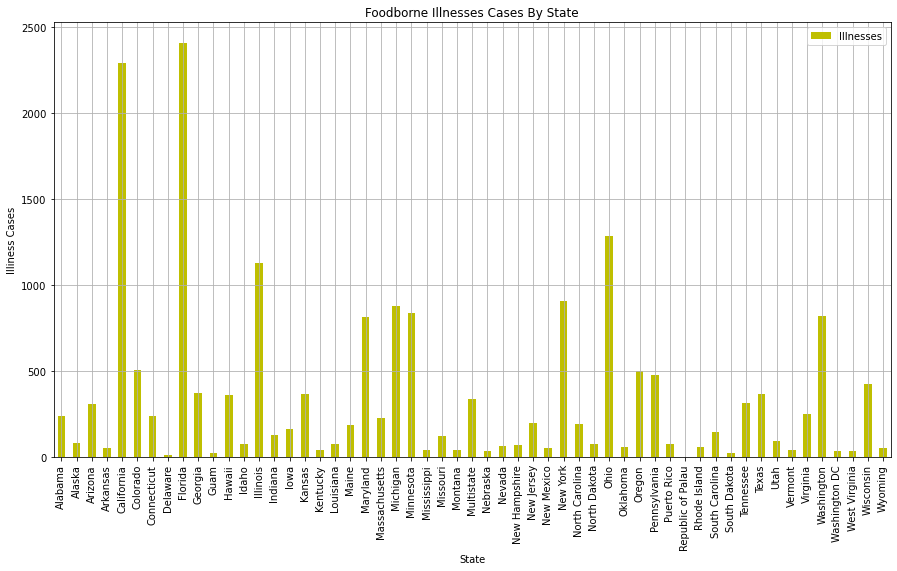

In [95]:
df1 = pd.pivot_table(outbreak_df, index='State', values='Illnesses', aggfunc='count')
ax = df1.plot(kind='bar', color='y', grid=True)
plt.title('Foodborne Illnesses Cases By State')
plt.ylabel('Illiness Cases')
fig = plt.gcf()
fig.set_size_inches(15, 8)

In [ ]:
# Clearly,California and Florida have extreamly high rate of foodborne illnesses. The possible reasons 
# could be related to their population rate during the years of 1998-2015. An exceptional circumstance would be 
#the outbreak of Salmonella Infections linked to Peanut Butter: at least 36 people across 17 states have been affected by a salmonella outbreak between May 9 and July 27. 
#,2008 - 2009. Majority of peanut butter was sent to California and Ohio, according to 
#https://www.healthline.com/health-news/salmonella-outbreak-in-17-states-linked-to-italian-meats-what-to-know#:~:text=At%20least%2036%20people%20across,abdominal%20pain%2C%20and%20usually%20diarrhea.

In [ ]:
##Data cleasning& organizing

In [ ]:
#1) Any missing value? 

In [12]:
outbreak_df.isnull().sum()

Year                     0
Month                    0
State                    0
Location              2166
Food                  8963
Ingredient           17243
Species               6619
Serotype/Genotype    15212
Status                6619
Illnesses                0
Hospitalizations      3625
Fatalities            3601
dtype: int64

In [15]:
missing_value = outbreak_df.isnull().sum()*100/len(outbreak_df)
missing_value

Year                  0.000000
Month                 0.000000
State                 0.000000
Location             11.329044
Food                 46.880067
Ingredient           90.187771
Species              34.620012
Serotype/Genotype    79.564831
Status               34.620012
Illnesses             0.000000
Hospitalizations     18.960197
Fatalities           18.834667
dtype: float64

In [ ]:
#Clearly, the dataset has missing values. The data missing can be MNAR, for example, the restaruant is unwilling 
#to report the location, food, ingredient and species; 
#or the customers are not able to recall what food or ingredient caused the outbreaks. 
#Besides, most foodborne infections go undiagnosed and unreported, because the those people 
#don't see the doctors, or the doctor doesn’t made a specific diagnoses according to the CDC. 
#The missing data also can be MAR, for example, the missing data of ingredient and species can be related to
#missing data of food; the missing data of fatalities can be related to missing data of hospitalizations. 

In [19]:
#2) Filter the dataset, drop the columns that are not related to the topic
##Since the ratio of null fields in the column'Serotype/Genotype' and 'Ingredient' to the total number of rows 
#exceeds 60%,which are proved not useful for the data anlysis. 
#Therefore I choose to drop those two columns from my table.
#Then, drop all null values.

In [27]:
df2 = outbreak_df.copy()
cols = [5,7]
df2.drop(df2.columns[cols], axis=1, inplace= True)
df2.dropna(inplace=True)
df2.head()

,Year,Month,State,Location,Food,Species,Status,Illnesses,Hospitalizations,Fatalities
3,1998,January,California,Restaurant,"Fish, Ahi",Scombroid toxin,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",Salmonella enterica,Confirmed,26,3.0,0.0
7,1998,January,California,Restaurant,"Stuffing, Unspecified; Sandwich, Turkey",Salmonella enterica,Confirmed,4,3.0,0.0
15,1998,January,Florida,Restaurant,"Ethnic Style, Unspecified",Clostridium perfringens,Suspected,3,0.0,0.0
17,1998,January,Florida,Restaurant,"Ground Beef, Cheeseburger",Staphylococcus aureus,Suspected,2,0.0,0.0


In [28]:
df2.isnull().sum()

Year                0
Month               0
State               0
Location            0
Food                0
Species             0
Status              0
Illnesses           0
Hospitalizations    0
Fatalities          0
dtype: int64

In [ ]:
#The data cleansing is finish, and the data does need to be cleaned, 
#because the null values and excessive null columns are dropped.